In [1]:
from wand.image import Image as WImage
from IPython.display import Image

Protocol used by Albertas to generate this data: https://benchling.com/anavickas/f/lib_VNejBHt6-protocols/prt_2Bkfh557-meripseq/edit

HIV-1 IIIB Virus 
https://aidsreagent.org/reagentdetail.cfm?t=viruses&id=607

## Preprocessing

We've started analyzing from raw `fastq` files. Then, we trimmed `NNNAGATCGGAAGAGCACACGTCTGAACTCCAGTCA` sequence from each reads using `cutadapt` ([see documents](https://cutadapt.readthedocs.io/en/stable/)). Trimmed `fastq` files aligned to Human genome `gencode.v28.annotation.gtf` using STAR aligner. In addition, unmmaped reads for each `fastq` file saved to a new `fastq` file to align seprately to HIV genome. Therefore, HIV genome indices created by changing sequence provided by Judd to `.fa` format using `bowtie2` ([see documents](https://github.com/BenLangmead/bowtie2)).

For downstream analysis of meRIPSeq experiment, all `bam`  files (mapped to human genome or hiv genome) renamed in this format: 
> `<sample>.<species>.<treatment>.<input/m6A>.bam`

## Peakcalling 

We are using RADAR package for meRIP data analysis ([see RADAR manual](https://scottzijiezhang.github.io/RADARmanual/workflow.html)). It will run over bam files for each treatment: 
- 'METTL14'
- 'METTL3'
- 'Virma'
- 'WTAP'

> To assess the pattern of variation of the MeRIP-seq data, we plot the heatmap of methylation level (represented by the normalized IP read counts adjusted for expression level).

1. In the heatmap plots we're seeing reproducible changes where both replicates behave similar. However, there are peaks that show higher methylation in non-treated samples. At this point, we can also proceed to report the significantly differentially methylated bins to genomic locations according to the main questions in this experiment design.

2. Secound plot shows the ratio of regional representations of methylations in each non-treated vs. treated comparisons.

3. PCA (Principal component analysis) plots

4. The same concept as the first heatmap plot for hiv peaks

# Control

Comparing to RADAR package, exomepeak also claculate coverage for only non threted samples. We used different conda `environment` for exomepeak (and it takes long time to run!!). Here we compare Input and IP 

In [ ]:
library(exomePeak)
txdb <- makeTxDbFromGFF('/rumi/shams/genomes/hg38/gencode.v28.annotation.gtf',organism='Homo sapiens')
setwd("/rumi/shams/abe/People/Judd/bam")
print (txdb)
res <- exomepeak(
    TXDB=txdb,
    IP_BAM=list.files(pattern='human.NT.m6A.bam$'),
    INPUT_BAM=list.files(pattern='human.NT.input.bam$'),
    OUTPUT_DIR='../exomepeak',
    EXPERIMENT_NAME='control'
)
saveRDS(res, paste('../exomepeak','control', 'results.rds', sep='/'))

As expected, there is high density of methylation peaks at end of CDS. 

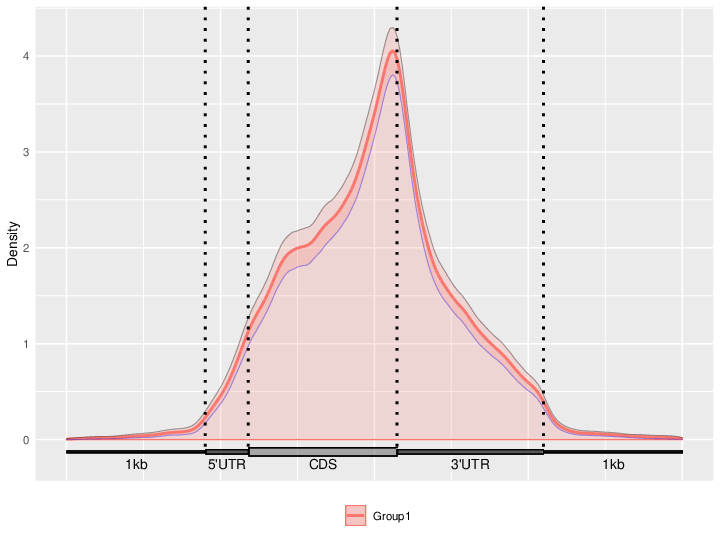

In [52]:
img = WImage(filename='plots/control_mrna_test.pdf', resolution=90) # bigger
img

## Motif analysis 

We've anlyzed only non-trated samples here. We've used [FIRE](https://tavazoielab.c2b2.columbia.edu/FIRE/) to compare m6A vs. input peaks for `[AG]GAC` and `[AGT][AG]AC[ACT]` motifs. The result shows significant presence of these motifs as expected. 

In [2]:
img = WImage(filename='exomepeak/control/motifs_of_interest_FIRE/RNA/peaks_teiser.txt.summary.pdf', 
             resolution=800) # bigger
img

### Non-Treated vs. Treated 
We are using control peaks as reference for each of four knockdowns to count reads that map to them. Then, we have done differential expression analysis to evaluate diffrentioal peaks. 

<img src="plots/all_PCAs.png" style="height:600px">

<img src="plots/all_Histograms.png" style="height:600px">

<img src="plots/all_Volcanos.png" style="height:600px">

## Similar paper 
> [Dynamics of the human and viral m6 A RNA methylomes during HIV-1 infection of T cells](https://www.nature.com/articles/nmicrobiol201611.pdf?proof=t)
[GEO](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE74016)

It might be informative to analyze data in this paper using above pipeline. However, they’re using [pLAI.2 HIV](https://aidsreagent.org/reagentdetail.cfm?t=molecular_clones&id=47) but Judd have used [HIV-1 IIIB Virus](https://aidsreagent.org/reagentdetail.cfm?t=viruses&id=607). Also, the study design and meRIP data they have is a bit different.